In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler


In [3]:
# Load dataset
data = pd.read_csv("creditcard.csv")  # Download from: https://www.kaggle.com/mlg-ulb/creditcardfraud

# Drop 'Time' column
data = data.drop(columns=['Time'])

In [5]:
# Normalize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop(columns=['Class']))

In [7]:
# Apply Isolation Forest
model = IsolationForest(n_estimators=100, contamination=0.0017, random_state=42)
data['anomaly_score'] = model.fit_predict(scaled_data)

In [9]:
# Map -1 as fraud, 1 as normal
data['predicted_class'] = data['anomaly_score'].map({1: 0, -1: 1})

In [11]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix:")
print(confusion_matrix(data['Class'], data['predicted_class']))
print("\nClassification Report:")
print(classification_report(data['Class'], data['predicted_class']))

Confusion Matrix:
[[283969    346]
 [   353    139]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.29      0.28      0.28       492

    accuracy                           1.00    284807
   macro avg       0.64      0.64      0.64    284807
weighted avg       1.00      1.00      1.00    284807



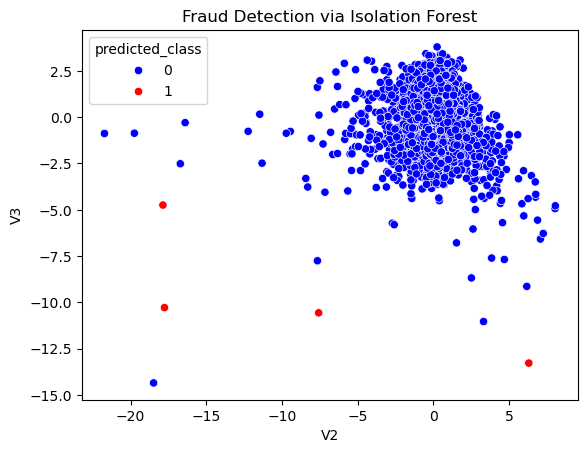

In [13]:
# Visualize a subset
sample = data.sample(5000, random_state=1)
sns.scatterplot(
    x=sample['V2'], y=sample['V3'], 
    hue=sample['predicted_class'], 
    palette={0: 'blue', 1: 'red'}
)
plt.title("Fraud Detection via Isolation Forest")
plt.xlabel("V2")
plt.ylabel("V3")
plt.show()